# Chapter 9

Script 9-1: K-means clustering

In [1]:
#import packages needed
import pandas as pd
from sklearn.cluster import KMeans
import igraph as ig
from igraph import Graph
import numpy as np
import os
from scipy.spatial.distance import pdist

In [2]:
#import file
File ="/Users/franckm/Documents/draftcodefiles/Friendship_Factors.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(File))
mydata = pd.read_csv(os.path.basename(File),encoding='latin1')
mydata

,Individual ID,Current Teammates,Workout Together,Weekend Sports,Attended Game,Homework Together,Class 1,Class 2,Class 3,Class 4
0,1,1,1,0,1,1,1,0,0,1
1,2,1,1,1,1,1,1,1,1,0
2,3,1,1,1,1,1,1,0,1,0
3,4,1,1,1,1,1,0,1,0,1
4,5,1,1,0,1,1,0,1,0,1
5,6,0,1,0,1,1,0,0,1,0
6,7,0,1,1,1,1,0,0,1,1
7,8,1,0,0,1,0,0,1,0,1
8,9,1,0,0,1,0,0,1,0,0
9,10,1,0,0,1,1,0,0,1,1


In [3]:
#k-means model
X=mydata[mydata.columns.drop('Individual ID')]
km=KMeans(n_clusters=3,init='random',n_init=5)
km_model=km.fit_predict(X)

In [4]:
#explore k-means model
km_model

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 1, 1], dtype=int32)

In [5]:
#add to dataset as first solution
km_1=np.array(km_model)+1
mydata['km_1']=km_1

In [6]:
#create network via Pearson correlation
cor=np.corrcoef(X)
cor[cor>=0.5]=1
cor[cor<0.5]=0
X2=np.asmatrix(cor)

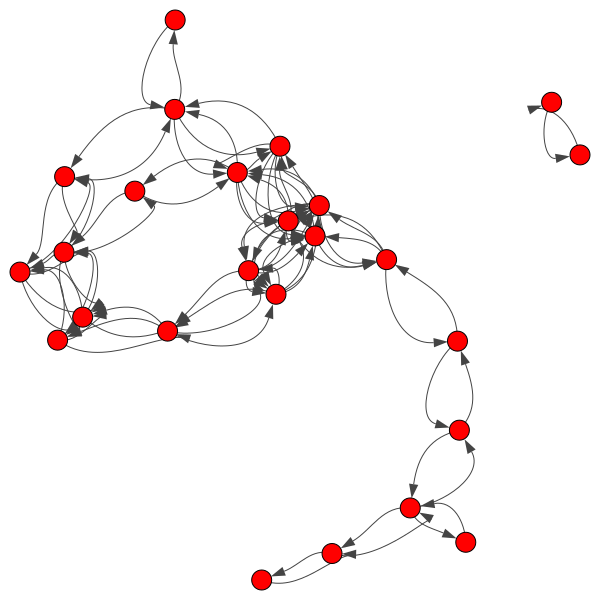

In [7]:
#create graph with self-loops removed
friends=Graph.Adjacency(X2,diag=False)
edge_list=friends.get_edgelist()
self_loop=[]
for i in range(0,25):
    self=(i,i)
    self_loop.append(self)
to_remove=[]
for i in edge_list:
    for j in self_loop:
        if i==j:
            to_remove.append(i)
friends.delete_edges(to_remove)
ig.plot(friends)

In [8]:
#create scaled metrics and attach to X
d=np.array(Graph.degree(friends))/10
p=np.array(Graph.pagerank(friends))*20
X['degree']=d
X['pagerank']=p

/var/folders/31/w56d47t956zfp0kklgtz_yq40000gn/T/ipykernel_3945/1489012741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['degree']=d


In [9]:
#create new k-means model with graph metrics added
km2=KMeans(n_clusters=3,init='random',n_init=5)
km_model2=km2.fit_predict(X)

In [10]:
#explore new k-means model
km_model2

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 0], dtype=int32)

In [11]:
#add to dataset as first solution
km_2=np.array(km_model2)+1
mydata['km_2']=km_2

In [12]:
#import packages needed
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [13]:
#perform spectral clustering and attach to dataset
sc = SpectralClustering(3, affinity='precomputed', n_init=5)
sp_clust=sc.fit(cor)
mydata['sp']=sp_clust.labels_+1
sp_clust.labels_

/Users/franckm/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0], dtype=int32)

Script 9-2

In [14]:
#install packages if you have not installed them on your machine
#!pip install dgl
#!pip install torch

In [15]:
#import packages
import dgl
import dgl.data
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools  
from dgl.nn import SAGEConv

In [16]:
#import Karate Club dataset with officer labels
dataset = dgl.data.KarateClubDataset()
num_classes = dataset.num_classes
g = dataset[0]

In [17]:
#embed vertices with a dimension of 6
vert_em = nn.Embedding(g.number_of_nodes(),6) 
inputs = vert_em.weight                  
nn.init.xavier_uniform_(inputs)

Parameter containing:
tensor([[-0.1524,  0.2658, -0.2394, -0.3014,  0.3128,  0.1725],
        [-0.1249,  0.1549,  0.3465, -0.1081,  0.0964,  0.2661],
        [-0.3334, -0.0622,  0.1700, -0.0718, -0.2070,  0.3102],
        [ 0.0137,  0.0479,  0.1074, -0.1915, -0.1096, -0.3296],
        [ 0.3256, -0.1248, -0.1326,  0.2262, -0.1408,  0.0697],
        [-0.0812, -0.1556,  0.0187, -0.1246,  0.3422, -0.1429],
        [ 0.2473, -0.1579,  0.0124, -0.0248, -0.2432, -0.0103],
        [ 0.3611,  0.3411,  0.0368,  0.2605, -0.1826,  0.3181],
        [-0.0070, -0.1894, -0.0031,  0.3710, -0.1623,  0.3739],
        [-0.2433, -0.1243, -0.1167, -0.0707,  0.0569,  0.1318],
        [ 0.1581,  0.0670,  0.1888, -0.1491,  0.3713, -0.2693],
        [-0.0470,  0.0423, -0.3734, -0.0562, -0.1159,  0.3312],
        [ 0.1883, -0.3135,  0.0335,  0.3198,  0.1567, -0.0093],
        [-0.0469, -0.0168,  0.0716, -0.2215, -0.0942, -0.2874],
        [ 0.1846,  0.3422,  0.3204,  0.0393, -0.0798,  0.1451],
        [ 0.0765, 

In [18]:
#obtain labels and denote available labels for GNN learning (here: 1, 3, 5, 12, 15, 32)
labels = g.ndata['label']
labeled_nodes = [1, 3, 5, 12, 15, 32]

In [ ]:
#build a three-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats1, h_feats2, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats1, 'mean')
        self.conv2 = SAGEConv(h_feats1, h_feats2, 'mean')
        self.conv3 = SAGEConv(h_feats2, num_classes, 'mean')
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        h = self.conv3(g, h)
        return h

#6 embedding dimensions as input, a hidden layers of 8 and 6 nodes, and 2 classes to output
net = GraphSAGE(6,8,6,2)

#GNN training parameters
optimizer=torch.optim.SGD(itertools.chain(net.parameters(), vert_em.parameters()),lr=0.01,
                          momentum=0.8)
all_logits = []

#train GNN
for e in range(990):
    logits = net(g, inputs)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels[labeled_nodes])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach())
    if e % 90 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

In [ ]:
#obtain accuracy statistics
pred = torch.argmax(logits, axis=1)
print('Accuracy', (pred == labels).sum().item() / len(pred))